<a href="https://colab.research.google.com/github/FedorYatsenko/NN_Labs/blob/master/Lab3_homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лаб. 3 Федір Яценко
### Варіант № 17

### Imports

In [2]:
import os
import cv2
import numpy as np

import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, normalize

### Метод перемішування shuffle

In [0]:
test_array = np.array([[1., 2.], [3., 4.], [5., 6.], [7., 8.], [9., 10.]])

print(test_array, '\n')
print(shuffle(test_array), '\n')
print(shuffle(test_array, n_samples=3))

[[ 1.  2.]
 [ 3.  4.]
 [ 5.  6.]
 [ 7.  8.]
 [ 9. 10.]] 

[[ 1.  2.]
 [ 5.  6.]
 [ 7.  8.]
 [ 3.  4.]
 [ 9. 10.]] 

[[1. 2.]
 [7. 8.]
 [5. 6.]]


### Функція відображення картинки

In [0]:
def show_img(img):
  plt.imshow(img)
  plt.colorbar()
  plt.grid(False)
  plt.show()

### Завантаження даних

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
Uploaded: 100 files

Digit 0


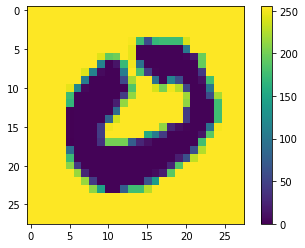

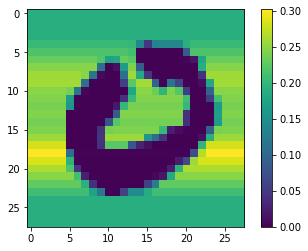

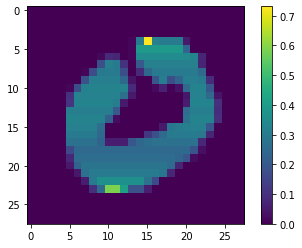

In [4]:
drive.mount('/content/drive')

path = "/content/drive/My Drive/Colab Notebooks/lab3/samples/"

imgs = []
for f in os.listdir(path):
  index = int(f[0])
  imgs.append((index, cv2.imread(path + f, 0)))

print(f"Uploaded: {len(imgs)} files\n")

dgt, dgt_img = imgs[0]
print(f"Digit {dgt}")
show_img(dgt_img)

dgt_img_norm = normalize(dgt_img)
show_img(dgt_img_norm)

dgt_img = cv2.bitwise_not(dgt_img)
dgt_img = np.array(dgt_img)
dgt_img_norm = normalize(dgt_img)
show_img(dgt_img_norm)


### Інвертування значень

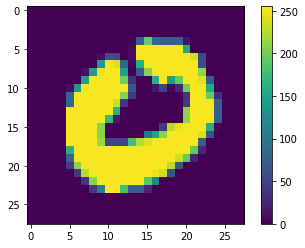

In [0]:
bit_not = cv2.bitwise_not(dgt_img)
show_img(bit_not)

### Створення навчальної та перевірочної вибірки

x_train: (90, 28, 28), y_train: (90, 10)
x_test: (10, 28, 28), y_test: (10, 10)



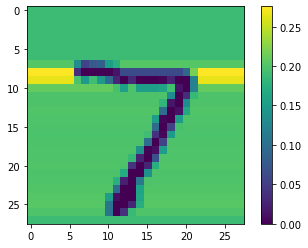

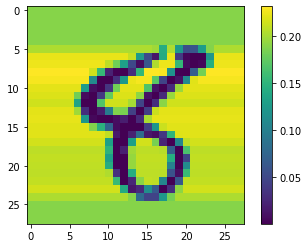

In [0]:
rand_imgs = shuffle(imgs)

border = len(imgs) // 10  # 10 %
test, train = rand_imgs[:border], rand_imgs[border:]

y_train, x_train = map(list, zip(*train))
x_train, y_train = normalize(x_train), to_categorical(y_train, num_classes=10)

y_test, x_test = map(list, zip(*test))
x_test, y_test = normalize(x_test), to_categorical(y_test, num_classes=10)

print(f"x_train: {x_train.shape}, y_train: {y_train.shape}")
print(f"x_test: {x_test.shape}, y_test: {y_test.shape}\n")

show_img(x_train[0])
show_img(x_test[0])

### Перші 25 зображень

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


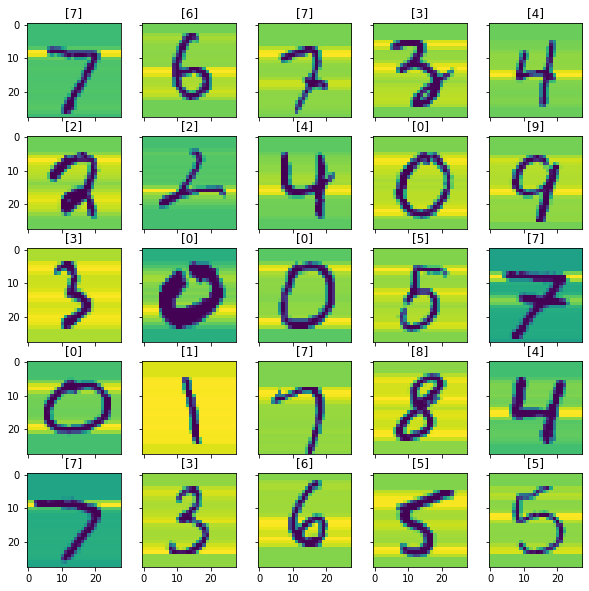

In [0]:
fig, axs = plt.subplots(5, 5)
fig.set_size_inches(10, 10)
for i in range(5):
  for j in range(5):
    axs[i, j].imshow(x_train[i*5 + j])
    axs[i, j].set_title(np.where(y_train[i*5 + j]==1)[0])

for ax in axs.flat:
    ax.label_outer()


### Flatten
\- шар необхідний для перетворення вектору попереднього шару з багатомірного до одномірного (не рахуючи ось партії(batch)). Наприклад:
`model.output_shape == (None, 64, 32, 32)`
буде перетворена на:
`model.output_shape == (None, 65536)`.


Розмірність визначається автоматично з попереднього шару, в розглянотому випадку: 64 * 32 * 32 = 65536.

Застосовується перед шаром Dense, через те, що цей шар сприймаючи вектор розмірністью більше одного, застосовується лише для останьої розмірності та незалежно для всіх інших. Наприклад для вектору розміру (5,3) він застосується 5 разів для векторів розмірністью (3,). Якщо ж необхідно розглядати вектор (5,3) як один масив даних, за допомогою Flatten його зводять до вектору (15,) який вже подають на шар Dense. Тому в першому випадку результатом буде вектор (5,16), а в другому (16,). Приклад: див. код нижче. [Посилання на джерело - stackoverflow](https://stackoverflow.com/questions/43237124/what-is-the-role-of-flatten-in-keras)

In [0]:
test_model = Sequential([
    Dense(16, input_shape=(5,3)),
    Dense(2)
])
print(test_model.summary())
print('\n\n\n')

test_model = Sequential([
    Flatten(input_shape=(5,3)),
    Dense(16),
    Dense(2)
])
print(test_model.summary())
print('\n\n\n')

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 5, 16)             64        
_________________________________________________________________
dense_23 (Dense)             (None, 5, 2)              34        
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________
None




Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 15)                0         
_________________________________________________________________
dense_24 (Dense)             (None, 16)                256       
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 34        
Total params: 290
Trainable